# 📚 2.3 Feature Engineering

En el notebook pasado, `2_EDA.ipynb`, no hicimos ninguna modificación a los datos. Por lo tanto, usaremos el mismo conjunto de datos `./data/titanic_clean.csv`.

> **Feature engineering** es el proceso de crear nuevas variables (features) a partir de los datos existentes y transformar valores de variables actuales para mejorar el rendimiento de un modelo de machine learning. Esto incluye técnicas como normalización, escalado, codificación de variables categóricas y creación de nuevas variables derivadas de las existentes.

### Importar paquetes

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import QuantileTransformer

### Carga de Datos

In [2]:
df = pd.read_csv('./data/titanic_clean.csv')

## Feature Engineering
Al momento de entrenar un modelo de machine learning, es común que tengamos la necesidad de crear nuevas variables. Un ejemplo de esto podría ser en un modelo de predicción de ventas, donde podríamos crear una nueva variable que represente el día de la semana a partir de una columna de fechas, ya que las ventas pueden variar significativamente entre días laborables y fines de semana.

### Antes de feature engineering

| id_venta  | fecha_venta  | valor_venta |
|-----------|--------------|-------------|
| 2050423   | 2024-07-01   | 5400        |
| 3423434   | 2024-07-06   | 3844        |
| 4994933   | 2024-03-05   | 9200        |

### Después de feature engineering

| id_venta  | fecha_venta  | dia_venta  | valor_venta |
|-----------|--------------|------------|-------------|
| 2050423   | 2024-07-01   | lunes      | 5400        |
| 3423434   | 2024-07-08   | lunes      | 3844        |
| 4994933   | 2024-03-06   | miércoles  | 9200        |

En nuestro caso, no crearemos nuevas variables, pero sí realizaremos transformaciones a nuestros datos que harán que nuestros modelos sean más precisos. Estas transformaciones son muy comunes en modelos de machine learning.

#### Codificación de variables categóricas
La codificación de variables categóricas es el proceso de convertir datos categóricos (como colores o tipos de productos) en números para que los modelos de machine learning puedan utilizarlos. Por ejemplo, convertir "rojo", "verde" y "azul" en 1, 2 y 3.

**Debemos recordar que los modelos de machine learning son funciones matemáticas**

Esto implica que los datos de entrada a estos modelos deben ser números también. Nuestro conjunto de datos tiene algunas variables categóricas:

- `Sex`
- `Embarked`

#### Scikit Learn `LabelEncoder`

Scikit Learn es la librería por excelencia para hacer aprendizaje automático en Python. Este paquete cuenta con una clase LabelEncoder que se utiliza justamente para convertir variables categóricas a numéricas. 

In [3]:
from sklearn.preprocessing import LabelEncoder

# Datos categóricos de ejemplo
animales = ['gato', 'perro', 'pez', 'gato', 'perro']

# Crear una instancia de LabelEncoder
le = LabelEncoder()

# Ajustar y transformar los datos
animales_codificados = le.fit_transform(animales)

# Mostrar los datos codificados
print(animales_codificados)

# Si deseas ver cómo se mapean las etiquetas originales
print(list(le.classes_))

[0 1 2 0 1]
[np.str_('gato'), np.str_('perro'), np.str_('pez')]


#### Codificación de `Sex` y `Embarked`

In [4]:
label_sex = LabelEncoder()
label_embarked = LabelEncoder()

# Fit and transform on training data
df['Sex'] = label_sex.fit_transform(df['Sex'])
df['Embarked'] = label_embarked.fit_transform(df['Embarked'])

Sí… es así de simple. Ahora veamos `df`

In [5]:
df.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
284,0,1,1,28.0,0,0,26.00,2
264,0,3,0,28.0,0,0,7.75,1
426,1,2,0,28.0,1,0,26.00,2
549,1,2,1,8.0,1,1,36.75,2
330,1,3,0,28.0,2,0,23.25,1


|   | Survived | Pclass | Sex | Age       | SibSp | Parch | Fare       | Embarked |
|---|----------|--------|-----|-----------|-------|-------|------------|----------|
| 133 | 1        | 2      | 0   | 0.300173  | 1     | 0     | 0.388356   | 2        |
| 539 | 1        | 1      | 0   | -0.695859 | 0     | 2     | 0.903441   | 0        |
| 778 | 0        | 3      | 1   | -0.021125 | 0     | 0     | -1.193728  | 1        |
| 603 | 0        | 3      | 1   | 1.106433  | 0     | 0     | -0.537371  | 2        |
| 333 | 0        | 3      | 1   | -1.268851 | 2     | 0     | 0.154104   | 2        |

**¡Ya no tenemos variables categóricas!**

### Normalización
Adicional al proceso de codificación de variables categóricas, un paso muy útil y muy común en Feature Engineering es normalización.

**¡Preguntamemos a ChatGPT!**

Prompt 💡:
> Explica en términos simples qué es el proceso de normalización en Feature Engineering. Mantén tu respuesta corta y concisa.

Respuesta 🤖
> La normalización en Feature Engineering es un proceso que ajusta los valores de las características (features) de los datos para que estén dentro de un rango común, típicamente entre 0 y 1. Esto se hace para mejorar el rendimiento y la velocidad de los algoritmos de aprendizaje automático, asegurando que todas las características tengan la misma escala y no dominen unas sobre otras.

Sigamos en este mismo chat ahora con el siguiente prompt:

Prompt 💡:
> No entiendo por qué tener datos dentro de un rango común mejoraría rendimiento y velocidad de los algoritmos de aprendizaje automático.

Respuesta 🤖:
> Tener datos dentro de un rango común mejora el rendimiento y la velocidad de los algoritmos de aprendizaje automático por varias razones:
>
> 1. **Convergencia más rápida:** Los algoritmos de optimización, como el descenso de gradiente, convergen más rápido cuando las características están en la misma escala. Esto se debe a que evita que algunas características dominen el proceso de ajuste del modelo.
>
> 2. **Estabilidad numérica:** Ayuda a evitar problemas de estabilidad numérica durante los cálculos, ya que los valores muy grandes o muy pequeños pueden causar errores en las operaciones matemáticas.
>
> 3. **Mejora de la precisión:** Permite que los algoritmos consideren todas las características por igual, mejorando así la precisión del modelo al evitar que las características con valores más grandes tengan una influencia desproporcionada.
>
> 4. **Uniformidad en las métricas de distancia:** En algoritmos que dependen de la distancia entre puntos de datos (como k-vecinos más cercanos o máquinas de soporte vectorial), la normalización asegura que ninguna característica desproporcionalmente afecte las medidas de distancia.
>
> En resumen, la normalización ayuda a que los algoritmos funcionen de manera más eficiente y efectiva, al asegurar que todas las características contribuyan de manera equitativa al proceso de aprendizaje.

Prompt 💡:
>¿Esto tiene algo que ver con la distribución normal? Después de todo, el proceso se llama “normalización”.

Respuesta 🤖:
>Es comprensible la confusión, pero en el contexto de Feature Engineering, "normalización" no se refiere a la distribución normal (gaussiana). Aquí se trata de escalar los datos a un rango común, y es un término más general. Hay dos conceptos que suenan similares pero son distintos:
>
> 1. **Normalización (Min-Max Scaling):** Escala los datos para que caigan dentro de un rango específico, como [0, 1] o [-1, 1]. Esto se hace independientemente de la forma de la distribución de los datos originales.
>
> 2. **Estandarización (Z-score Scaling):** Transforma los datos para que tengan una media de 0 y una desviación estándar de 1. Aquí es donde la distribución normal entra en juego, ya que este proceso asume que los datos se distribuyen aproximadamente de manera normal y transforma los datos a una distribución con estas características.
>
> El término "normalización" en Feature Engineering generalmente se refiere al primero (escalado a un rango específico) y no implica que los datos resultantes sigan una distribución normal.

---

Bien, ahora que tenemos más contexto sobre normalización, procedamos a implementarlo en dónde nos sea necesario.

Tenemos dos variables numéricas cuyos rangos y distrubución no es ideal.

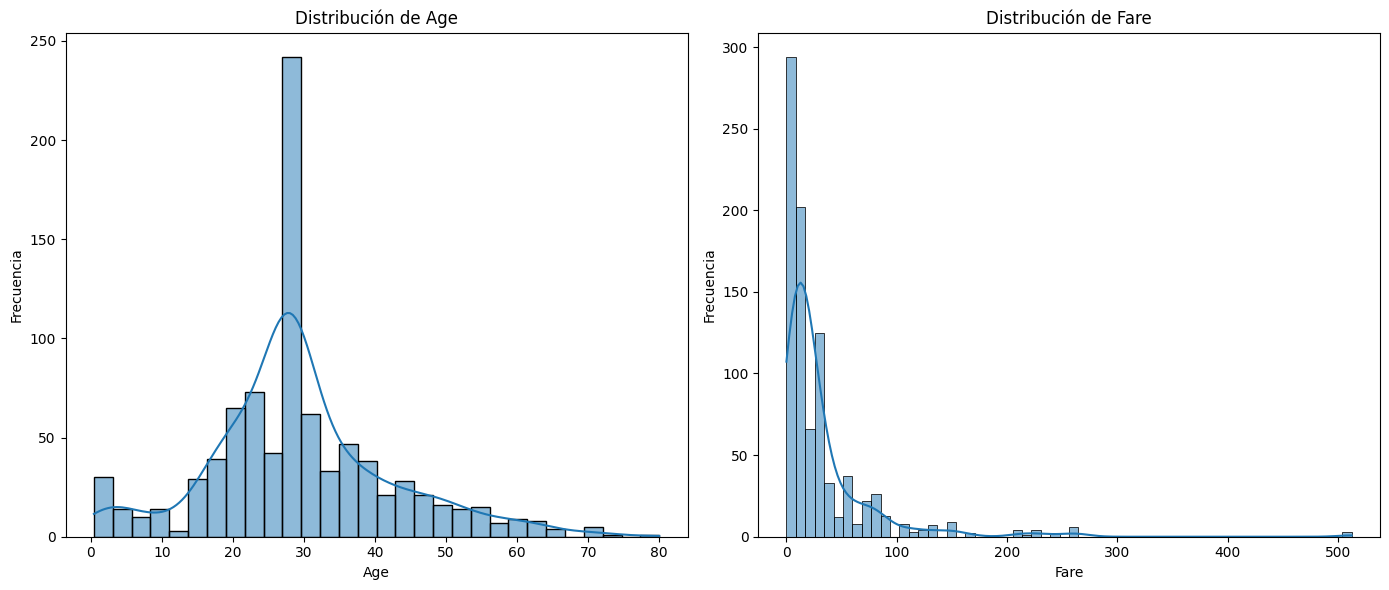

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(df['Age'].dropna(), kde=True, ax=axes[0])
axes[0].set_title('Distribución de Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frecuencia')

# Gráfica de la distribución de Fare
sns.histplot(df['Fare'].dropna(), kde=True, ax=axes[1])
axes[1].set_title('Distribución de Fare')
axes[1].set_xlabel('Fare')
axes[1].set_ylabel('Frecuencia')

# Mostrar las gráficas
plt.tight_layout()
plt.show()

> **Tip**
> Las distribución de `Age` se muestra distribuida aproximadamente de manera normal entre 0 y 80 años, y `Fare` altamente sesgada con muchos valores bajos y algunos valores atípicos elevados. Normalizar estas variables nos servirá porque ajusta los valores a un rango común, mejorando la convergencia de los algoritmos que implementaremos.

#### Sckit Learn `QuantileTransformer`
> El `QuantileTransformer` es una herramienta de Scikit-Learn que transforma los datos para que sigan una distribución uniforme o normal. Esto se logra ajustando los valores de los datos según sus cuantiles, lo que puede reducir el impacto de los valores atípicos y mejorar el rendimiento de los algoritmos de aprendizaje automático.

Usar `QuantileTransformer` de Scikit-Learn para normalizar `Age` y `Fare` es una buena idea porque transforma las características a una distribución uniforme o normal, lo cual es especialmente útil para manejar características con distribuciones muy sesgadas o con valores atípicos. Dado que `Fare` tiene una distribución altamente sesgada con una larga cola, `QuantileTransformer` puede redistribuir los datos de manera más equitativa.

In [7]:
qun_tra_age = QuantileTransformer(output_distribution = 'normal', n_quantiles=500)
qun_tra_fare = QuantileTransformer(output_distribution = 'normal', n_quantiles=500)

df['Age'] = qun_tra_age.fit_transform(df[['Age']])
df['Fare'] = qun_tra_fare.fit_transform(df[['Fare']])

Después de ejecutar este código, vuelve a generar las gráficas de las distrubuciones. Ahora vemos lo siguiente:

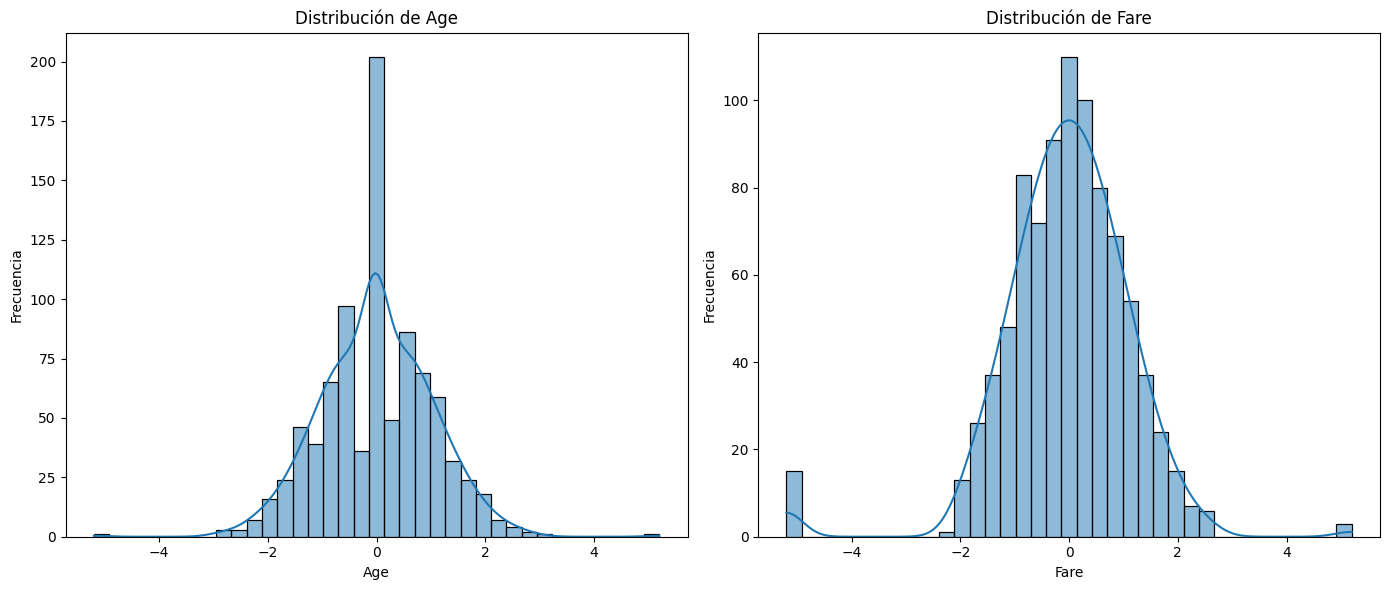

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(df['Age'].dropna(), kde=True, ax=axes[0])
axes[0].set_title('Distribución de Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frecuencia')

# Gráfica de la distribución de Fare
sns.histplot(df['Fare'].dropna(), kde=True, ax=axes[1])
axes[1].set_title('Distribución de Fare')
axes[1].set_xlabel('Fare')
axes[1].set_ylabel('Frecuencia')

# Mostrar las gráficas
plt.tight_layout()
plt.show()

> **Tip**
> Ahora ambas variables siguen una distribución normal. Nota cómo ahora Age ya no cuenta con valores de entre 0 y 80 años, sino -5 y 5 con una media de 0.

### Escalado
El proceso de ajustar los valores de las características a un rango específico se llama escalado, y éste es necesario por varias razones:

- **Equilibrio de características**: En un dataset, diferentes características pueden tener diferentes escalas. Por ejemplo, `Age` puede variar de 0 a 80, mientras que `Fare` puede variar de 0 a 500. Sin escalado, los algoritmos de aprendizaje automático pueden dar más peso a las características con valores más grandes, afectando el rendimiento del modelo.

- **Mejor rendimiento del modelo**: Los algoritmos de optimización, como el descenso de gradiente, convergen más rápido y de manera más estable cuando las características están en la misma escala. Esto ayuda a encontrar la solución óptima más eficientemente.

- **Uniformidad en las métricas de distancia**: En algoritmos que dependen de la distancia entre puntos de datos, como KNN y SVM, el escalado asegura que ninguna característica domine la métrica de distancia debido a su magnitud.

### MinMaxScaler

El `MinMaxScaler` es una herramienta específica para el escalado que ajusta los valores de los datos para que estén dentro de un rango definido, típicamente entre 0 y 1. Este escalado lineal transforma los datos utilizando la fórmula:

$$
X_{escalado} = \frac{X - X_{min}}{X_{max} - X_{min}}
$$

donde:
- $X$ es el valor original,
- $X_{min}$ es el valor mínimo en la característica,
- $X_{max}$ es el valor máximo.

Esto asegura que todas las características contribuyan equitativamente al proceso de modelado.

In [9]:
mms_pclass= MinMaxScaler()
mms_sex = MinMaxScaler()
mms_age = MinMaxScaler()
mms_sibsp = MinMaxScaler()
mms_parch = MinMaxScaler()
mms_fare = MinMaxScaler()
mms_embarked = MinMaxScaler()

# Ejecutar transformaciones
df['Pclass'] = mms_pclass.fit_transform(df[['Pclass']])
df['Sex'] = mms_sex.fit_transform(df[['Sex']])
df['Age'] = mms_age.fit_transform(df[['Age']])
df['SibSp'] = mms_sibsp.fit_transform(df[['SibSp']])
df['Parch'] = mms_parch.fit_transform(df[['Parch']])
df['Fare'] = mms_fare.fit_transform(df[['Fare']])
df['Embarked'] = mms_embarked.fit_transform(df[['Embarked']])

**Creación de objetos MinMaxScaler:**

**Líneas 1-7:** Crean objetos MinMaxScaler individuales para cada columna
- `mms_pclass = MinMaxScaler()` - Crea un escalador para la columna Pclass
- `mms_sex = MinMaxScaler()` - Crea un escalador para la columna Sex  
- `mms_age = MinMaxScaler()` - Crea un escalador para la columna Age
- Y así sucesivamente para cada variable...

**¿Por qué objetos separados?** Cada columna tiene su propio rango de valores, por lo que necesita su propio escalador con sus propios parámetros min/max.

**Aplicación de transformaciones:**

**Líneas 9-15:** Aplican la transformación MinMaxScaler a cada columna
- `df['Pclass'] = mms_pclass.fit_transform(df[['Pclass']])`
  - `fit_transform()` hace dos cosas: **aprende** los valores min/max de la columna y **transforma** los datos
  - `df[['Pclass']]` usa doble corchete para mantener formato DataFrame (requerido por MinMaxScaler)
  - El resultado se asigna de vuelta a la misma columna, reemplazando los valores originales

**¿Qué hace MinMaxScaler?** Transforma los valores al rango [0, 1] usando la fórmula:
```
valor_normalizado = (valor_original - min) / (max - min)
```

**Resultado:** Todas las columnas quedan escaladas entre 0 y 1, lo que es útil para algoritmos de machine learning que son sensibles a la escala de los datos.

**Nota:** Este código tiene un problema: `Sex` y `Embarked` son variables categóricas y deberían codificarse primero (ej: LabelEncoder) antes de aplicar MinMaxScaler.

Si vemos una muestra de 5 registros de nuestro dataset, ahora tenemos:

|   | Survived | Pclass | Sex | Age       | SibSp | Parch | Fare       | Embarked |
|---|----------|--------|-----|-----------|-------|-------|------------|----------|
| 563 | 0        | 1.0    | 1.0 | 0.497969  | 0.000 | 0.000000 | 0.448323   | 1.0      |
| 394 | 1        | 1.0    | 0.0 | 0.447853  | 0.000 | 0.333333 | 0.513451   | 1.0      |
| 731 | 0        | 1.0    | 1.0 | 0.360216  | 0.000 | 0.000000 | 0.516329   | 0.0      |
| 642 | 0        | 1.0    | 0.0 | 0.302943  | 0.375 | 0.333333 | 0.554198   | 1.0      |
| 484 | 1        | 0.0    | 1.0 | 0.456138  | 0.125 | 0.000000 | 0.647202   | 0.0      |

> **Atención**
> No hicimos transformación a Survided porque ésta es nuestra variable objetivo que usaremos en el siguiente notebook.


---

### Checkpoint
Normalmente podríamos continuar haciendo todo en el mismo Notebook, pero hagamos un checkpoint aquí. Guardemos nuestro conjunto de datos y continuemos al siguiente notebook `4_machine_learning.ipynb`.

In [10]:
df.to_csv('./data/titanic_procesado.csv', index=False)